Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

C:\Users\dabhi\AppData\Local\Temp\ipykernel_1508\2502120307.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


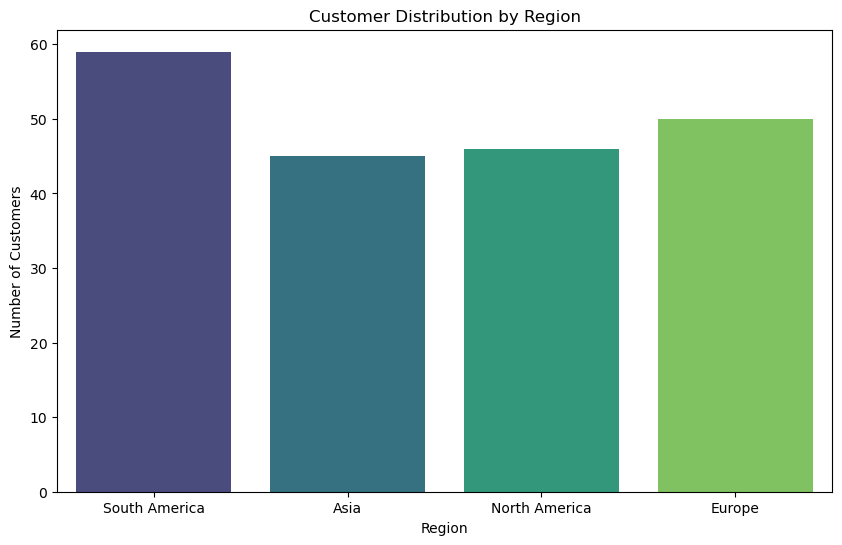

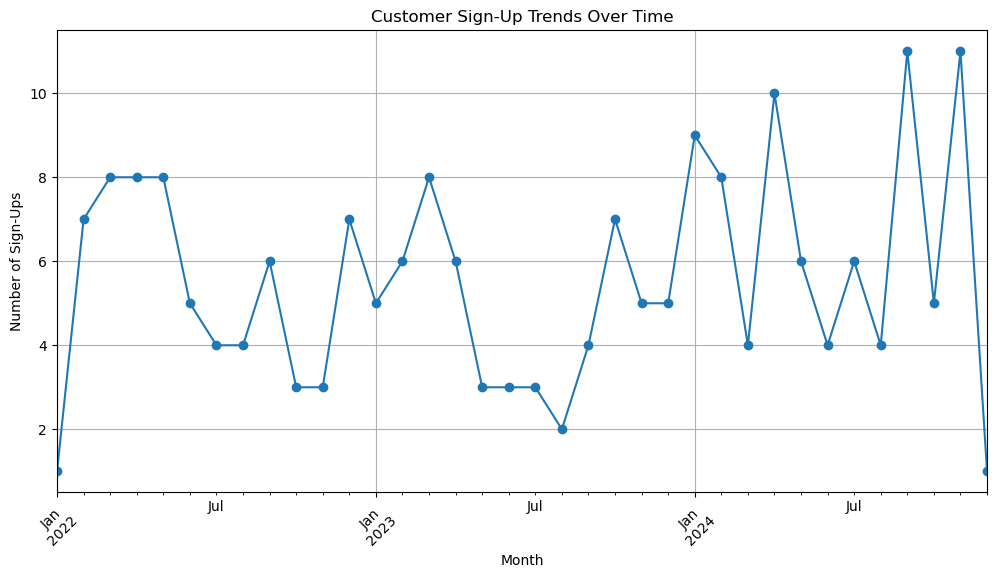

C:\Users\dabhi\AppData\Local\Temp\ipykernel_1508\2502120307.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_data.sort_values(by='TotalValue', ascending=False).head(10), x='TotalValue', y='ProductName', palette='plasma')


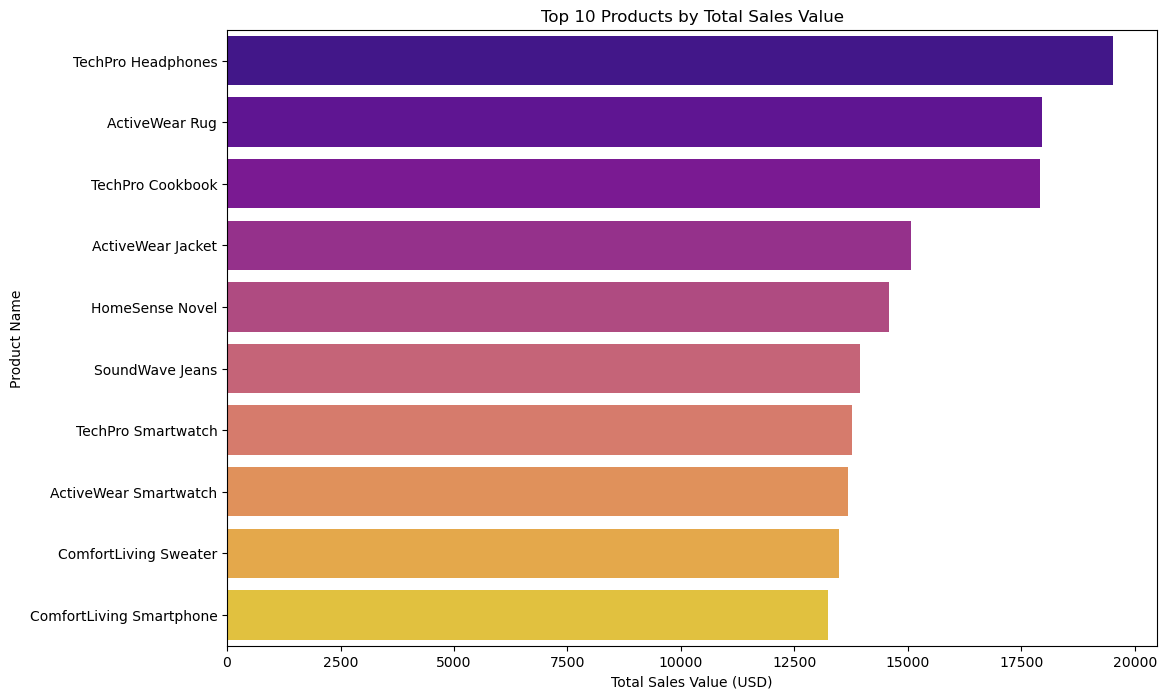

<Figure size 640x480 with 0 Axes>

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

# Data Cleaning
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Descriptive Statistics
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())

# Visualizations

# Customer Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup Trends Over Time
signup_trends = customers['SignupDate'].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o')
plt.title('Customer Sign-Up Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Sign-Ups')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Product Sales Analysis
transaction_summary = transactions.groupby('ProductID').agg({'TotalValue': 'sum'}).reset_index()
merged_data = transaction_summary.merge(products, on='ProductID')
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_data.sort_values(by='TotalValue', ascending=False).head(10), x='TotalValue', y='ProductName', palette='plasma')
plt.title('Top 10 Products by Total Sales Value')
plt.xlabel('Total Sales Value (USD)')
plt.ylabel('Product Name')
plt.show()

# Save plots if needed
plt.savefig("customer_distribution.png")
